# IMPORTS

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")

# READ THE DATA

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**








In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


# EXPLORATORY DATA ANALYSIS

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



In [4]:
#CHECK THE FIRST FIVE ROWS
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#CHECK THE LAST FIVE ROWS 
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
# SHAPE OF OUR DATASETS 
df.shape

(5000, 14)

In [7]:
print("Numbers Of Rows",df.shape[0])
print("Numbers Of Columns",df.shape[1])

Numbers Of Rows 5000
Numbers Of Columns 14


In [8]:
# CHECKING NULL VALUES IN THE DATASETS
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

1. **There is no null values in this datasets.**


In [9]:
#CHECKING DUPLICATES VALUES IN THE DATASETS
df.duplicated().sum()

0

1. **There is no duplicates values in the data.**
2. **Lets check the name and additional information about all the columns**

In [10]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

**About dataset**

---
**ID** : Unique identifier for each customer.

**Age** : Age of the customer.

**Experience** : Years of professional experience.

**Income** : Customer's annual income.

**ZIP Code** : Customer's postal code.

**Family** : Size of the customer's family.

**CCAvg** : Average credit card spending per month.

**Education** : Level of education attained.

**Mortgage** : Mortgage value, if applicable.

**Personal Loan** : Target variable indicating acceptance of a personal loan offer.

**Securities Account** : Whether the customer has a securities account.

**CD Account** : Whether the customer has a certificate of deposit account.

**Online** : Whether the customer uses online banking.

**CreditCard** : Whether the customer has a credit card.


In [63]:
#More information about the columns
df.describe().style.background_gradient()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,73.774200,2.396400,23.255256,1.881000,56.498800,0.096000,0.104400,0.060400,0.596800,0.294000
std,11.463166,46.033729,1.147663,20.971908,0.839869,101.713802,0.294621,0.305809,0.238250,0.490589,0.455637
min,23.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,1.000000,8.400000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,2.000000,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,98.000000,3.000000,30.000000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,4.000000,120.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#Data types of all the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


1. we can see that all columns have numerical value.
2. Our target varibale is "Personal Loan".

**Visualization**

**------------------**




In [13]:
# REPLACE THE NUMERIC VALUE WITH CATEGORICAL VALUES ONLY FOR VISUALIZATION
df["Personal Loan"]=df["Personal Loan"].replace({0:"Not Taken",1:"Taken"})
df["Education"]=df["Education"].replace({1:"Undergraduate",2:"Graduate",3:"Professional"})
df["Securities Account"]=df["Securities Account"].replace({0:"Does Not Have",1:"Have"})
df["CD Account"]=df["CD Account"].replace({0:"Does Not Have",1:"Have"})
df["Online"]=df["Online"].replace({0:"Not Using",1:"Using"})
df["CreditCard"]=df["CreditCard"].replace({0:"Does Not Have",1:"Have"})   

In [14]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduate,0,Not Taken,Have,Does Not Have,Not Using,Does Not Have
1,2,45,19,34,90089,3,1.5,Undergraduate,0,Not Taken,Have,Does Not Have,Not Using,Does Not Have
2,3,39,15,11,94720,1,1.0,Undergraduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
3,4,35,9,100,94112,1,2.7,Graduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
4,5,35,8,45,91330,4,1.0,Graduate,0,Not Taken,Does Not Have,Does Not Have,Not Using,Have
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Professional,0,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have
4996,4997,30,4,15,92037,4,0.4,Undergraduate,85,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have
4997,4998,63,39,24,93023,2,0.3,Professional,0,Not Taken,Does Not Have,Does Not Have,Not Using,Does Not Have
4998,4999,65,40,49,90034,3,0.5,Graduate,0,Not Taken,Does Not Have,Does Not Have,Using,Does Not Have


In [15]:
# CLASS DISTRIBUTION OF TARGET VARIABLE
df["Personal Loan"].value_counts() #PERSONAL LOAN

Not Taken    4520
Taken         480
Name: Personal Loan, dtype: int64

In [16]:
loan_count=df["Personal Loan"].value_counts()

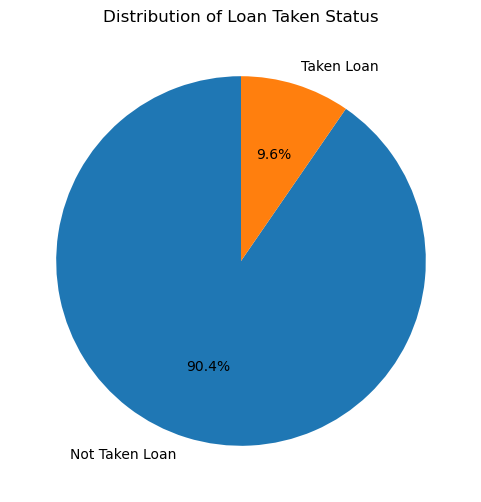

In [17]:
plt.figure(figsize=(6, 6))
plt.pie(loan_count,labels=["Not Taken Loan ", "Taken Loan"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Loan Taken Status")
plt.show()

**OBSERVATION**

---

1. From above pie chart we can see that our target variable distribution is highly imbalanced.
2. Majority of the customers Not taken the personal loan **(90.40%)**
3. Only **(9.60%)** customers has taken the loan.


<Axes: xlabel='Education', ylabel='count'>

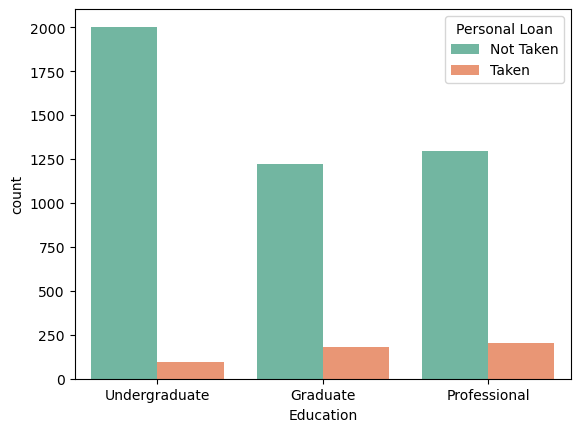

In [18]:
sns.countplot(x="Education",data=df,hue="Personal Loan",palette="Set2")

**OBSERVATION**
1. Customers that belong to education category **Graduation** and **Professional** have taken more Personal Loan then the **Undergraduate** class.

<Axes: xlabel='Family', ylabel='count'>

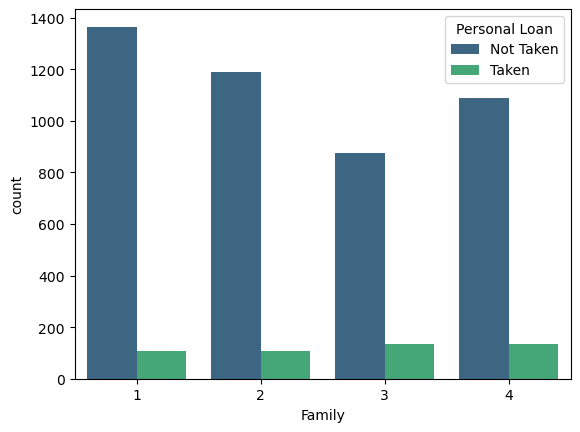

In [19]:
sns.countplot(x='Family',data=df,hue="Personal Loan",palette="viridis")

**OBSERVATION**

---
1. Family size of 3 and 4 members are tending to take Personal Loan.

<Axes: xlabel='Securities Account', ylabel='count'>

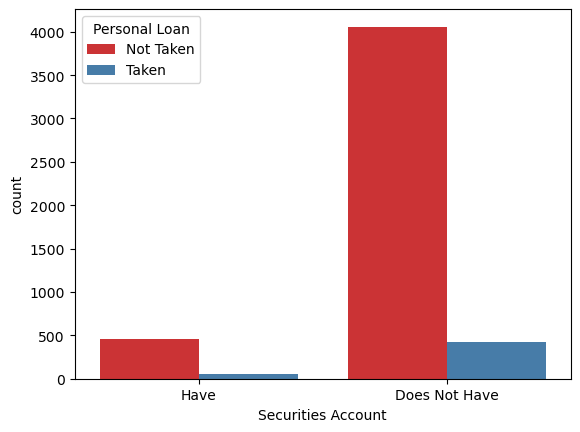

In [20]:
sns.countplot(x="Securities Account",data=df,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---

1. The customers who do not have a securities A/C have taken more loans compared to those who have a securities A/C.

<Axes: xlabel='CD Account', ylabel='count'>

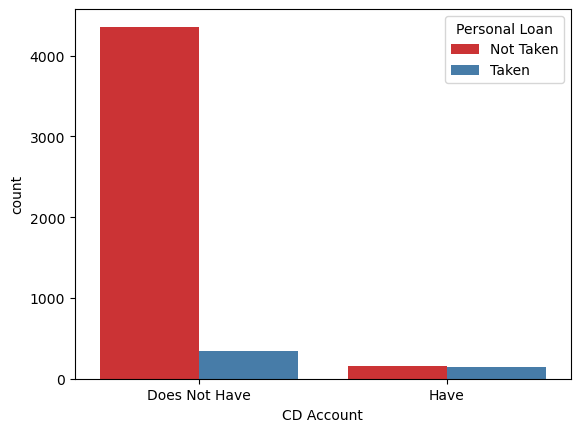

In [21]:
sns.countplot(x="CD Account",data=df,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---


1. We can see that customers who have a **Certificate of Deposit (CDAccount)** have mostly taken a Personal Loan.

2. Who do not have **Certificate of Deposit(CDAccount)** Most of them is not taken the personal loan.

<Axes: xlabel='Online', ylabel='count'>

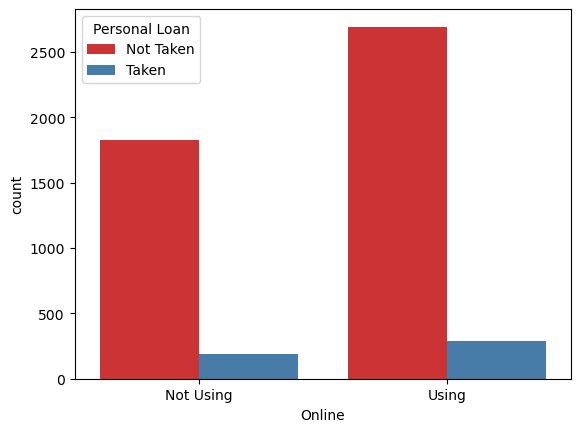

In [22]:
sns.countplot(x="Online",data=df,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---
1. Customers who use online banking services are more likely to have a higher number of personal loans than those who do not use online services.

<Axes: xlabel='CreditCard', ylabel='count'>

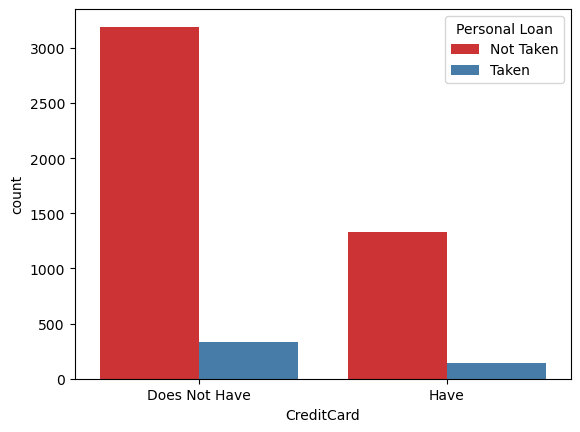

In [23]:
sns.countplot(x="CreditCard",data=df,hue="Personal Loan",palette="Set1")

**OBSERVATION**

---
1. Most people who have a **credit card** do not seem to take out a personal loan.

In [24]:
# NOW REPLACE WITH ORIGINAL VALUE OF DATA 
df["Personal Loan"]=df["Personal Loan"].replace({"Not Taken":0,"Taken":1})
df["Education"]=df["Education"].replace({"Undergraduate":1,"Graduate":2,"Professional":3})
df["Securities Account"]=df["Securities Account"].replace({"Does Not Have":0,"Have":1})
df["CD Account"]=df["CD Account"].replace({"Does Not Have":0,"Have":1})
df["Online"]=df["Online"].replace({"Not Using":0,"Using":1})
df["CreditCard"]=df["CreditCard"].replace({"Does Not Have":0,"Have":1})   

In [25]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [26]:
# CHECKING THE OUTLIERS
columns_to_plot = ['Age','Income', 'Family', 'CCAvg', 'Education', 'Mortgage' ,'Securities Account', 'CD Account', 'Online', 'CreditCard']

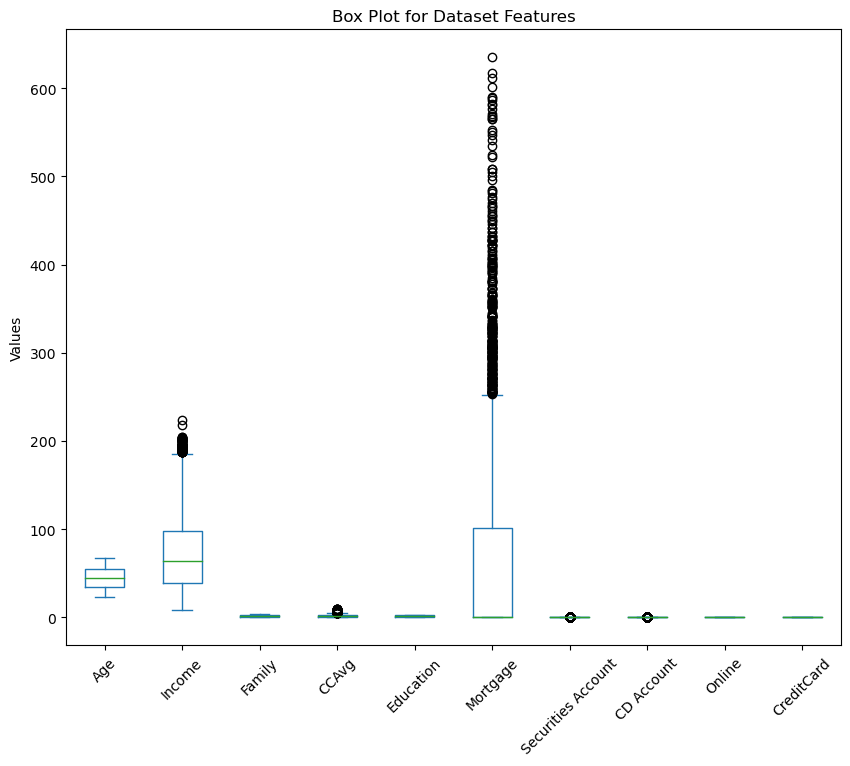

In [27]:
df[columns_to_plot].plot(kind="box", figsize=(10, 8))
plt.title("Box Plot for Dataset Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()

**Box Plot**


---
1. We can see that (Income,CCavg,Mortgage,Securities Account,CD Account) in this column some outliers are there.
2. Income is not fixed .it is based on several factors.
3. CCAvg is not fixed and it based on the spending behavior of the credit cardholder.
4. Mortage is also depend on the individuals.
5. Securities Account & CD Account having values in format of 0 & 1.
(0:means not having account,1:means having account)
6. I dont think so that the **outliers** are **Error** points.


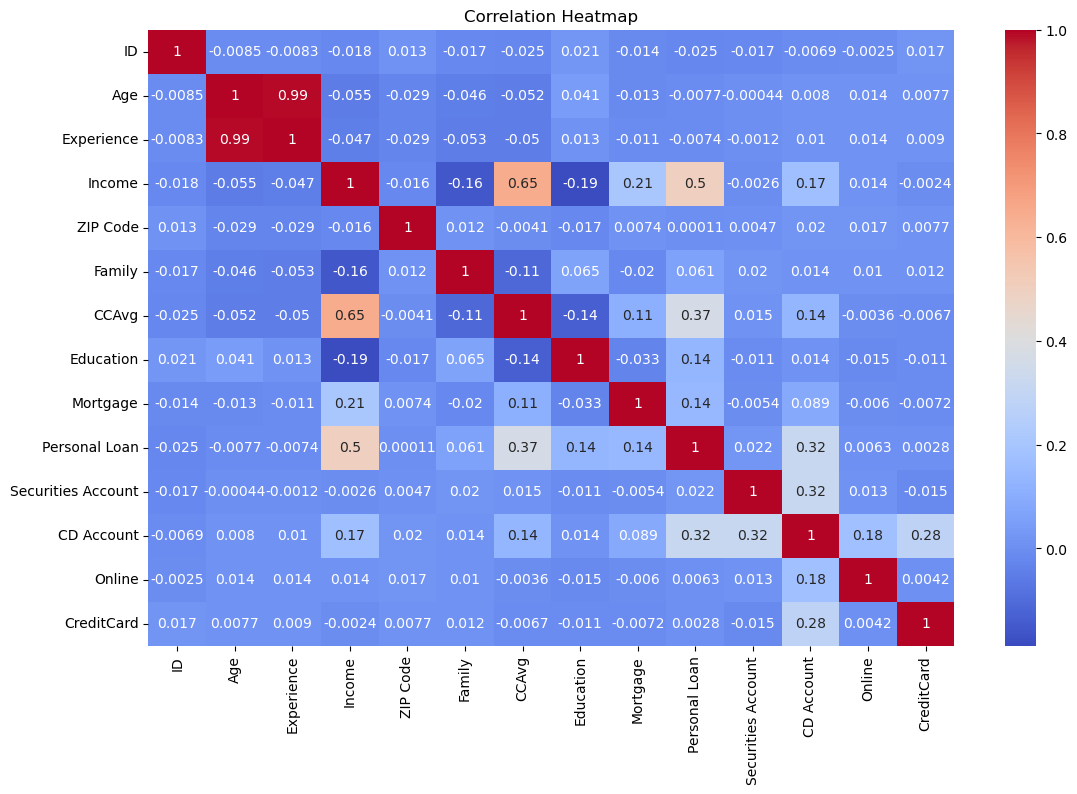

In [28]:
# VISUALIZE CORREALTION HEATMAP
correlation_matrix = df.corr()
plt.figure(figsize=(13,8))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

**OBSERVATION**


---

1. **"Experience"** and **"Age"** looks like highly positively correlated with each other.We can remove one of the variable to avoid multi-collinearity problem.
2. The other point is **"CCavg"** & **"Income"** is also correlated with each other.
3. But **"CCAvg"** contains values in month & **"Income"** contains values in annually.
4. we need to convert **"CCAvg"** in Annual.

# PREPROCESSING
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [29]:
# REPLACE "CCAvg" WITH ANNUAL
df['CCAvg'] = df['CCAvg']*12

In [30]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,19.2,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,18.0,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,12.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,32.4,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,12.0,2,0,0,0,0,0,1


In [31]:
df.drop(["ID","ZIP Code"],inplace=True,axis=1)

1. ID is uniformly distributed. Therefore, ID acts as an identifier and lacks valuable information for the model.
2. ZIP Code contains a large number of categories .
3. Therefore, it seems it lacks much informaton for our model.

In [32]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,19.2,1,0,0,1,0,0,0
1,45,19,34,3,18.0,1,0,0,1,0,0,0
2,39,15,11,1,12.0,1,0,0,0,0,0,0
3,35,9,100,1,32.4,2,0,0,0,0,0,0
4,35,8,45,4,12.0,2,0,0,0,0,0,1


In [33]:
df.drop("Experience",inplace=True,axis=1)

1. The dataset contains negative values for the Experience, which is unreasonable.
2. Further in our heatmap exploration, we have found that experience has a high correlation to age and will be dropping this column so we don't necessarily have to handle negative values.

### Dividing into Independent (X) & Dependent (y) variables. 

In [34]:
# SPLITING INTO INDEPENDENT & DEPENDENT FEATURES
X=df.drop("Personal Loan",axis=1)
y=df["Personal Loan"]

### **Train Test Split**



In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

# **Standard Scaler**
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**





In [36]:
# CREATE A OBJECT FOR NUMERIC FEATURES
numeric_columns=["Age","Income","CCAvg","Mortgage"]

In [37]:
sc=StandardScaler()
X_train[numeric_columns]=sc.fit_transform(X_train[numeric_columns])
X_test[numeric_columns]=sc.transform(X_test[numeric_columns])

In [38]:
# Ensuring that the scaling has been applied to the training data using the scaler.
X_train.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3115,-1.256633,0.794945,2,-0.990617,1,-0.559325,0,0,0,0
3261,1.641364,1.224918,1,1.048374,1,-0.559325,0,0,0,0
2733,0.851001,-0.043503,3,-0.933978,2,0.887982,0,0,0,0
1666,0.499729,2.493338,2,1.274929,2,-0.559325,0,0,1,0
1900,1.377910,-1.376419,4,-0.877340,2,-0.559325,0,0,1,0


In [39]:
# Ensuring that the scaling has been applied to the testing data using the scaler.
X_test.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
3817,1.729182,1.418406,1,-0.594146,1,-0.559325,0,0,0,0
1618,-1.432269,-0.967945,3,-0.537508,1,-0.559325,0,0,1,1
3188,0.851001,0.343473,2,1.444845,3,-0.559325,0,0,0,1
4396,-1.344451,-1.290424,4,-0.820701,3,-0.559325,0,0,1,0
101,1.377910,-0.946446,3,-0.367592,2,-0.559325,0,0,0,0


Using of Standard Scaler, we make our data more compliant to machine learning algorithms, ensuring better model performance and more reliable comparisons between different features.

# **Over sampling(SMOTE)**
**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**




In [40]:
os=SMOTE(random_state=123)

In [41]:
X_train_os,y_train_os=os.fit_resample(X_train,y_train)

In [42]:
# DISTRIBUTION OF TARGET VARIABLE AFTER OVER SAMPLING.
y_train_os.value_counts()

0    3616
1    3616
Name: Personal Loan, dtype: int64

1. Over-sampling Technique used in machine learning to address the class imbalance problem, particularly in classification tasks where one class significantly outnumbers the other.
2. This helps balance the class distribution.
3. I am using over sampling because,we aim to improve the model's ability to recognize and generalize patterns in the minority class, resulting in a more balanced and powerful predictive model.

# MODEL SELECTION

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**



**logistic Regression**

**----------------------------**



In [43]:
log=LogisticRegression()
log.fit(X_train_os,y_train_os)

LogisticRegression()

In [44]:
log_pred = log.predict(X_test)
log_cm = confusion_matrix(y_test,log_pred)
log_acc = accuracy_score(y_test,log_pred)
log_prec = precision_score(y_test,log_pred)
log_rec = recall_score(y_test,log_pred)
log_f1 = f1_score(y_test,log_pred)
print('Confusion matrix:\n',log_cm)
print('Accuracy score:',log_acc)
print('Precision score:',log_prec)
print('Recall score:',log_rec)
print('F1 score:',log_f1)

Confusion matrix:
 [[810  94]
 [ 13  83]]
Accuracy score: 0.893
Precision score: 0.4689265536723164
Recall score: 0.8645833333333334
F1 score: 0.6080586080586081


In [45]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       904
           1       0.47      0.86      0.61        96

    accuracy                           0.89      1000
   macro avg       0.73      0.88      0.77      1000
weighted avg       0.93      0.89      0.91      1000



**Naive Bayes**

**------------------**



In [46]:
nb=GaussianNB()

In [47]:
nb.fit(X_train_os,y_train_os)

GaussianNB()

In [48]:
nb_pred = nb.predict(X_test)
nb_cm = confusion_matrix(y_test,nb_pred)
nb_acc = accuracy_score(y_test,nb_pred)
nb_prec = precision_score(y_test,nb_pred)
nb_rec = recall_score(y_test,nb_pred)
nb_f1 = f1_score(y_test,nb_pred)
print('Confusion matrix:\n',nb_cm)
print('Accuracy score:',nb_acc)
print('Precision score:',nb_prec)
print('Recall score:',nb_rec)
print('F1 score:',nb_f1)

Confusion matrix:
 [[805  99]
 [ 18  78]]
Accuracy score: 0.883
Precision score: 0.4406779661016949
Recall score: 0.8125
F1 score: 0.5714285714285714


In [49]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       904
           1       0.44      0.81      0.57        96

    accuracy                           0.88      1000
   macro avg       0.71      0.85      0.75      1000
weighted avg       0.93      0.88      0.90      1000



**Svm(support vector machine)**

**------------------------------------------**



In [57]:
sv=SVC()

In [58]:
sv.fit(X_train_os,y_train_os)

SVC()

In [59]:
sv_pred = sv.predict(X_test)
sv_cm = confusion_matrix(y_test,sv_pred)
sv_acc = accuracy_score(y_test,sv_pred)
sv_prec = precision_score(y_test,sv_pred)
sv_rec = recall_score(y_test,sv_pred)
sv_f1 = f1_score(y_test,sv_pred)
print('Confusion matrix:\n',sv_cm)
print('Accuracy score:',sv_acc)
print('Precision score:',sv_prec)
print('Recall score:',sv_rec)
print('F1 score:',sv_f1)

Confusion matrix:
 [[872  32]
 [  5  91]]
Accuracy score: 0.963
Precision score: 0.7398373983739838
Recall score: 0.9479166666666666
F1 score: 0.8310502283105022


In [60]:
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       904
           1       0.74      0.95      0.83        96

    accuracy                           0.96      1000
   macro avg       0.87      0.96      0.91      1000
weighted avg       0.97      0.96      0.97      1000



In [61]:
final_data=pd.DataFrame({"Models":["LOGISTICS REGRESSION","NAIVE BAYES","SUPPORT VECTOR MACINE"],
                         "Accuracy":[accuracy_score(y_test,log_pred),
                                    accuracy_score(y_test,nb_pred),
                                    accuracy_score(y_test,sv_pred)],
                         "Precision":[precision_score(y_test,log_pred),
                                      precision_score(y_test,nb_pred),
                                      precision_score(y_test,sv_pred)],
                         "Recall":[recall_score(y_test,log_pred),
                                   recall_score(y_test,nb_pred),
                                   recall_score(y_test,sv_pred)],
                         "F1_score":[f1_score(y_test,log_pred),
                                     f1_score(y_test,nb_pred),
                                     f1_score(y_test,sv_pred)]})

In [62]:
final_data

,Models,Accuracy,Precision,Recall,F1_score
0,LOGISTICS REGRESSION,0.893,0.468927,0.864583,0.608059
1,NAIVE BAYES,0.883,0.440678,0.812500,0.571429
2,SUPPORT VECTOR MACINE,0.963,0.739837,0.947917,0.831050


<Axes: xlabel='Models', ylabel='Recall'>

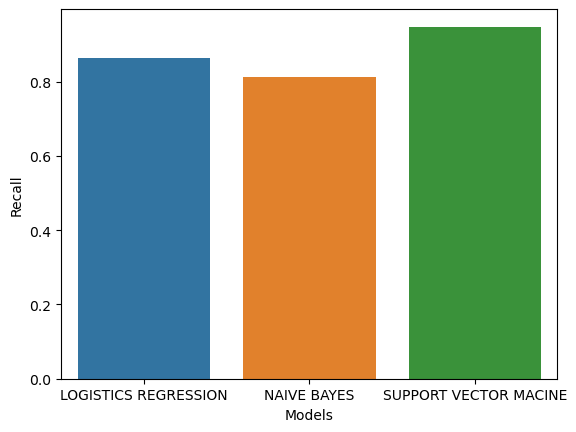

In [56]:
sns.barplot(x="Models",y="Recall",data=final_data)

# CONCLUSION

1. In conclusion, the analysis reveals that the dataset contains a highly imbalanced target variable, with a majority of customers (4520) not taking personal loans (0) and a smaller number (480) taking loans (1). 
2. Further exploration indicates that customers with educational backgrounds in Graduation and Professional categories are more likely to take personal loans compared to those with an Undergraduate education.
3. Family size also plays a role, with customers from families with 3 or 4 members showing a higher tendency to take personal loans. 
4. The absence of a securities account seems to be associated with a higher likelihood of taking a personal loan, while having a Certificate of Deposit (CDAccount) is positively correlated with personal loan uptake.
5. Additionally, customers using online banking services are more inclined to have personal loans. 
6. There is a negative trend where individuals with credit cards are less likely to take out personal loans.
7. Addressing the imbalanced target variable, the SMOTE (Synthetic Minority Over-sampling Technique) method has been employed along with standard scaling for numeric features **(age, CCavg, mortgage, income)**. Outliers are present but are not considered as error points.
8. Among the tested algorithms **(Logistic Regression, Naive Bayes, and Support Vector Machine)**, **SVM** outperforms others across multiple metrics, including accuracy **(96.3%)**, precision **(73.99%)**, recall **(94.79%)**, and F1 score **(83.11%)**. 
9. This suggests that **SVM** is the most suitable model for **predicting personal loan** uptake in this dataset

